# Data Set-up
In this lab we’re going to be looking at avocado prices.

0. Import the data and declare your package dependencies.

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
avocado = pd.read_csv('avocado-updated-2020.csv')
avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


1. Briefly describe the data set. What information does it contain? 

In [3]:
# Number of rows
rows = len(avocado.index)
print(rows)

# Number of columns
columns = len(avocado.columns)
print(columns)

# Data types of each column
print(avocado.dtypes) 

33045
13
date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object
33045
13
date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object


The dataset ‘avocado’ consists of weekly retail scan data for National retain volume and price. The data is based on retail sales of Hass avocados directly from cash registers. Each row is an observation from a singular day in a certain location/geography. The columns, or rather “variables” of the data set include the following: date, average_price, type, year, geography, total_volume, 4046, 4225, 4770. The date variable displays the date of when the observation was made, the average_price variable in the table represents a “per avocado” cost, type is whether the avocado is conventional or organic, year is the year of the observation, geography is the city or region of the observation, and total_volume is the total number of avocados sold. The 4046 variable is the total number of small Hass avocados with PLU 4046 sold, 4225 is the total number of large Hass avocados with PLU 4225 sold, and 4770 is the total number of extra large Hass avocados with PLU 4770 sold. “PLU” is the Product Lookup codes and are only for Hass avocados. Other variables include total_bags, small_bags, large_bags, and xlarge_bags. The dataset includes 13 variables and 33045 obervations.

2. Clean the data in any way you see fit.

In [4]:
# Filter out rows where geography is not "Total U.S." and rename columns
avocado_clean = avocado[avocado['geography'] != "Total U.S."].rename(columns={
    '4046': 'small_hass',
    '4225': 'large_hass',
    '4770': 'xl_hass',
})
# avocado_clean: The cleaned data without "Total U.S." and with renamed columns

# major_regions: Data from major regions
# Filter for major regions
major_regions = avocado_clean[avocado_clean['geography'].isin([
    "Northeast", "Southeast", "South Central", "Midsouth", "West", "Plains", "Great Lakes"
])]

# states: Data from specific states
# Filter for states
states = avocado_clean[avocado_clean['geography'].isin([
    "New York", "California", "West Tex/New Mexico", "South Carolina", "Northern New England"
])]

# small_regions: Data from all the remaining smaller regions, excluding major regions and specific states
# Filter for small regions by excluding major regions and states
small_regions = avocado_clean[
    ~avocado_clean['geography'].isin(major_regions['geography']) &
    ~avocado_clean['geography'].isin(states['geography'])
]

# Source: https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

# Exercises

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [5]:
# Filter, group, and find the region with the most organic, small Hass avocados sold in 2017
top_region = (avocado_clean[(avocado_clean['year'] == 2017) & 
                            (avocado_clean['type'] == 'organic') & 
                            (avocado_clean['geography'].isin(["Northeast", "Southeast", "South Central", "Midsouth", "West", "Plains", "Great Lakes"]))]
              .groupby('geography', observed=True)['small_hass'] # Groups the data by region and focuses on the small_hass column
              .sum() # Sums up the total number of small Hass avocados sold for each region
              .idxmax()) # Finds the region name with the max value

top_value = (avocado_clean[(avocado_clean['year'] == 2017) & 
                           (avocado_clean['type'] == 'organic') & 
                           (avocado_clean['geography'].isin(["Northeast", "Southeast", "South Central", "Midsouth", "West", "Plains", "Great Lakes"]))]
             .groupby('geography', observed=True)['small_hass']
             .sum()
             .max()) # Finds the largest (maximum) value among the summed totals

print(top_region)
print(top_value)

West
1870206.29
West
1870206.29


The West region sold the most organic, small Hass avocados in 2017, with a total of 1,870,206.29 units sold.

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [6]:
# Convert 'date' to datetime format
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

# Split date into 'month', 'day', and 'year'
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['year'] = avocado_clean['date'].dt.year

# Group by 'month' and calculate the average volume of avocado sales
avg_volume = avocado_clean.groupby('month')['total_volume'].mean()

# Find the month with the highest average volume
top_month = avg_volume.idxmax()
top_volume = avg_volume.max()

print(top_month)
print(top_volume)

# Source: https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/

5
712152.9642487771
5
712152.9642487771


May had the highest average volume of avocado sales, with an average volume of 712,152.96 units.

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [7]:
# Use small_regions for metro area geographical regions
# Group by 'geography' and calculates the total avocado sales for each metro area
metro_volume = small_regions.groupby('geography', observed=True)['total_volume'].sum()

# Sort the regions by total sales in descending order
sorted_volume = metro_volume.sort_values(ascending=False)

# Show top 5
top_5 = sorted_volume.head(5).index
top_5

Index(['Los Angeles', 'Dallas/Ft. Worth', 'Houston', 'Phoenix/Tucson',
       'Denver'],
      dtype='object', name='geography')

The "Los Angeles", "Dallas/Ft. Worth", "Houston", "Phoenix/Tucscon", and "Denver" metro area geographical regions sold the most total avocados.

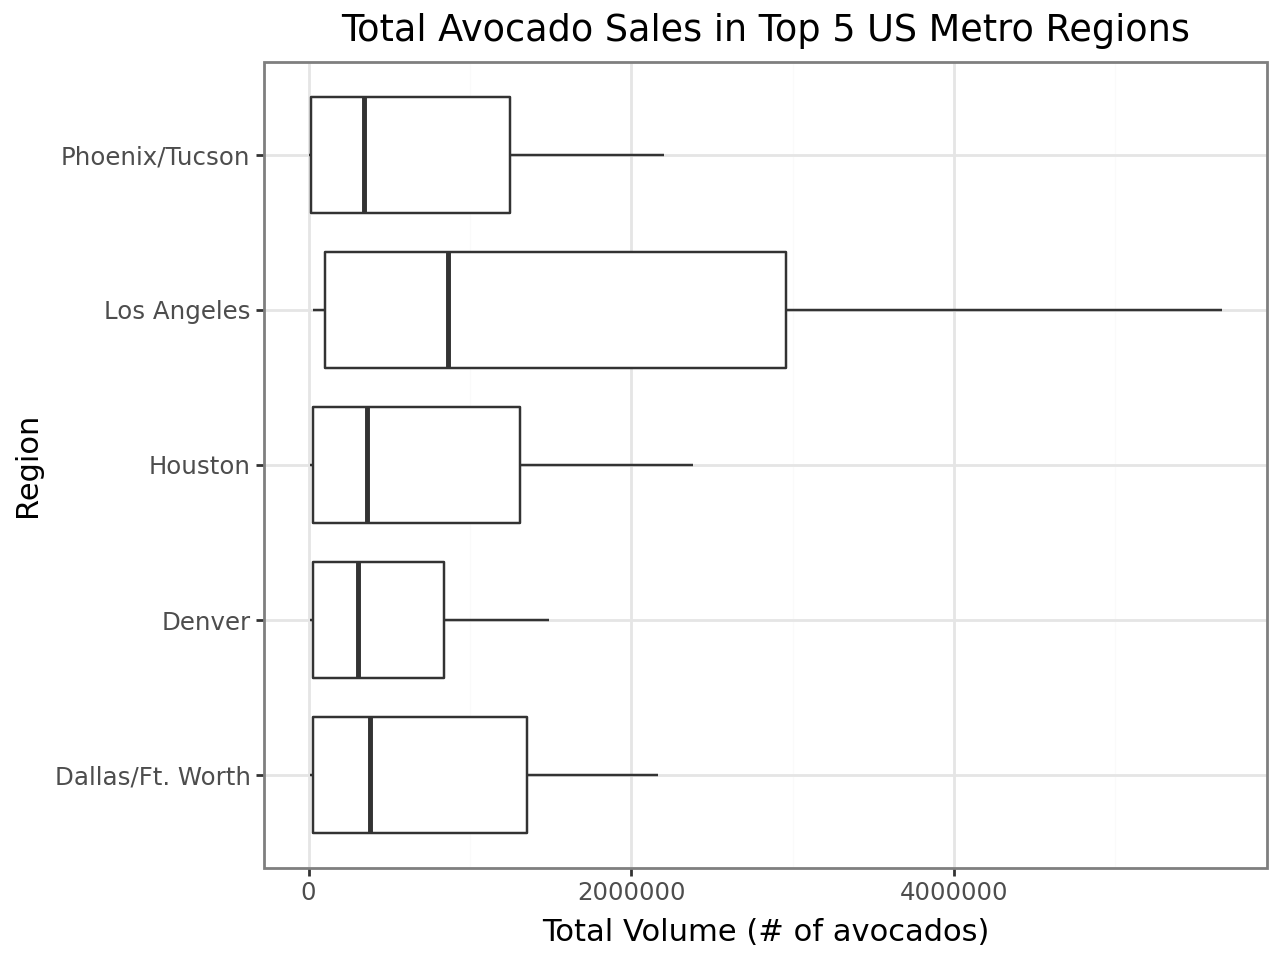

In [8]:
# Create new data frame with top 5 metro geographical regions
top_5_data = small_regions[small_regions['geography'].isin(top_5)]

# Box plots of total volume for the five metro geographical regions with the highest averages
(ggplot(top_5_data, aes(x = "geography", y = "total_volume")) + 
theme_bw() +
labs(title = "Total Avocado Sales in Top 5 US Metro Regions", 
    x = "Region", y="Total Volume (# of avocados)") +
geom_boxplot() +
coord_flip()
)

# Flip x and y axes: https://plotnine.org/reference/examples/geom_boxplot-preview

# Pivoting
The following four California geographical regions are in this data set: ."Los Angeles", "San Diego", "Sacramento", and "San Francisco"

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [32]:
# Filter for California geographical regions
cali = avocado_clean[avocado_clean['geography'].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])]

,date,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,1,4


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [23]:
# Group by 'geography' and 'type', and calculate mean price
avg_price_by_type = cali.groupby(['geography', 'type'],  observed=True)['average_price'].mean().reset_index()

# Pivot the data so that 'organic' and 'conventional' are separate columns
pivot_cali = avg_price_by_type.pivot(index='geography', columns='type', values='average_price').reset_index()

# Calculate the price difference between organic and conventional avocados
pivot_cali['price_difference'] = pivot_cali['organic'] - pivot_cali['conventional']
print(pivot_cali)

type      geography  conventional   organic  price_difference
0       Los Angeles      1.047124  1.574902          0.527778
1        Sacramento      1.295359  1.873856          0.578497
2         San Diego      1.113856  1.798366          0.684510
3     San Francisco      1.400490  2.119444          0.718954
type      geography  conventional   organic  price_difference
0       Los Angeles      1.047124  1.574902          0.527778
1        Sacramento      1.295359  1.873856          0.578497
2         San Diego      1.113856  1.798366          0.684510
3     San Francisco      1.400490  2.119444          0.718954


In the SanFrancisco region, the price of organic versus conventional avocados is the most different, with a difference of 0.719.

In [34]:
# Count the number of observations for each region and type
count_data = cali.groupby(['geography', 'type']).size().reset_index(name='count')

# Display the result
print(count_data)


       geography          type  count
0    Los Angeles  conventional    306
1    Los Angeles       organic    306
2     Sacramento  conventional    306
3     Sacramento       organic    306
4      San Diego  conventional    306
5      San Diego       organic    306
6  San Francisco  conventional    306
7  San Francisco       organic    306
       geography          type  count
0    Los Angeles  conventional    306
1    Los Angeles       organic    306
2     Sacramento  conventional    306
3     Sacramento       organic    306
4      San Diego  conventional    306
5      San Diego       organic    306
6  San Francisco  conventional    306
7  San Francisco       organic    306


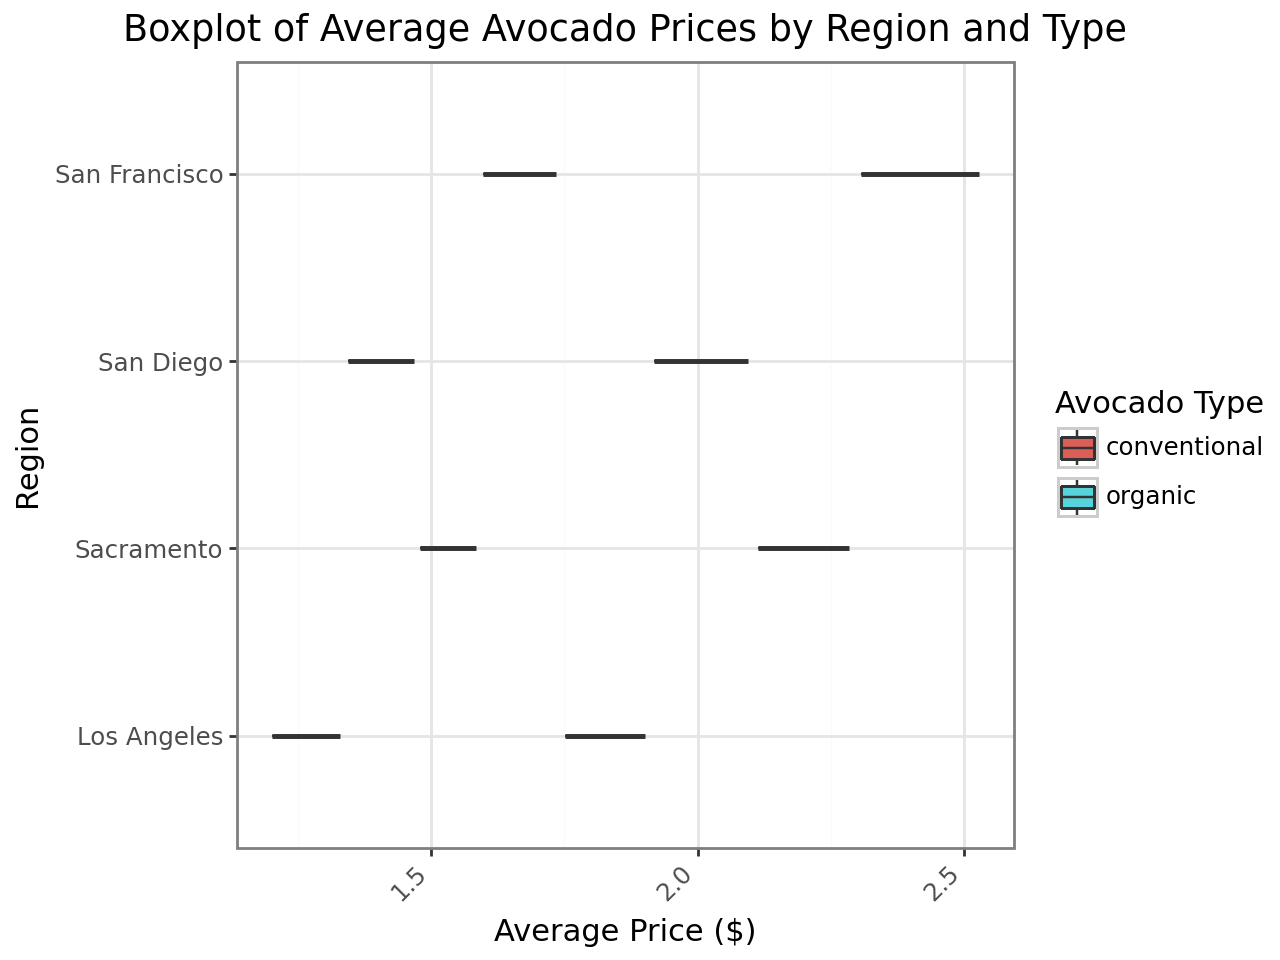

In [38]:
(ggplot(cali, aes(x='average_price', y='geography', fill='type')) +
        geom_boxplot() +
        labs(x="Average Price ($)", y="Region", fill="Avocado Type",
             title="Boxplot of Average Avocado Prices by Region and Type") +
        theme_bw() +
        theme(axis_text_x=element_text(rotation=45, hjust=1)))



8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

![Plot to recreate](Lab-2-Plot.png)

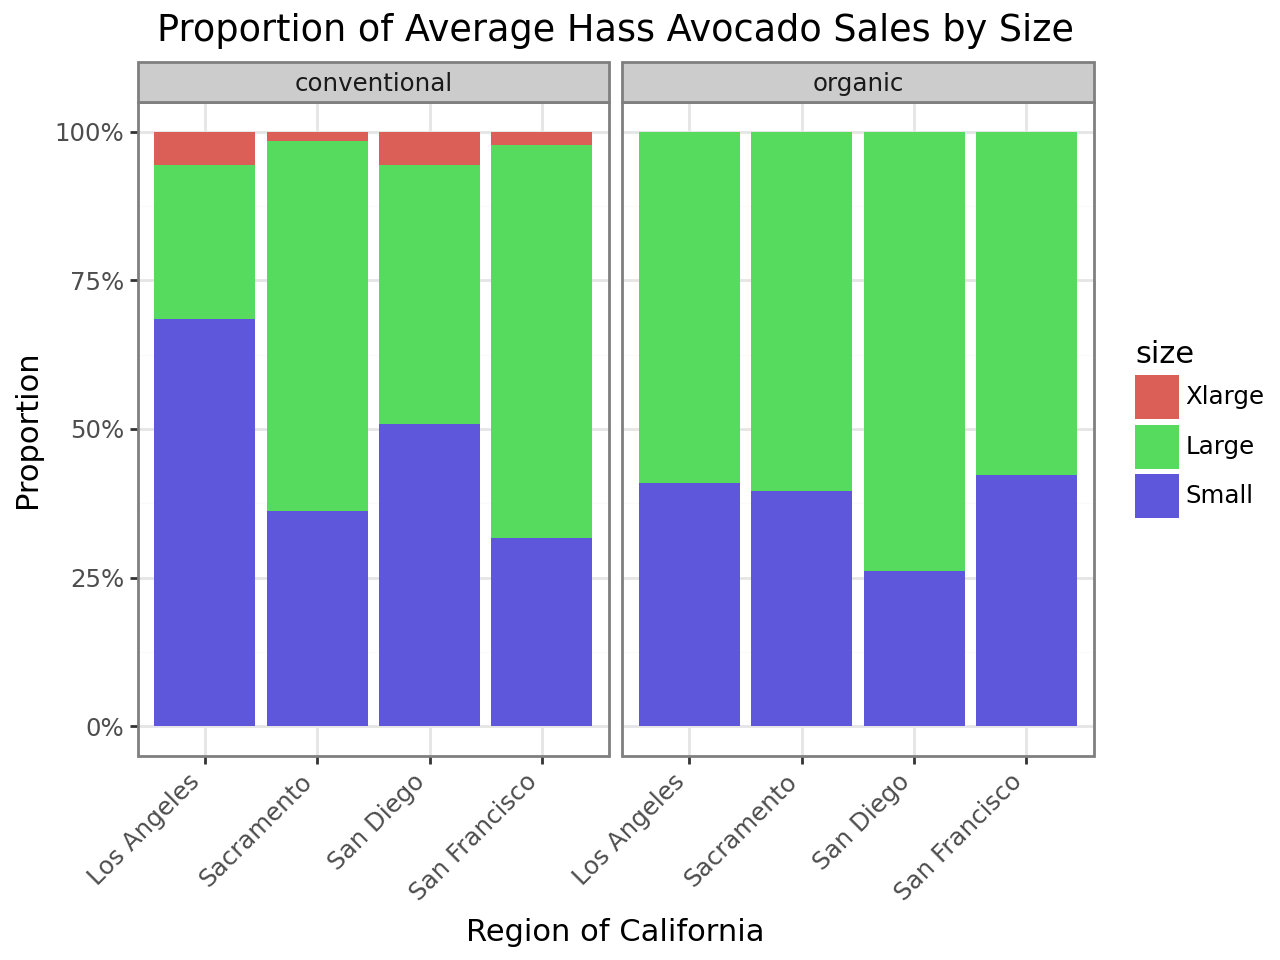

In [20]:
# Melt cali to transform 'small_hass', 'large_hass', and 'xl_hass' into a long format
cali_melted = cali.melt(id_vars=['geography', 'type'], 
                      value_vars=['small_hass', 'large_hass', 'xl_hass'], 
                      var_name='hass', 
                      value_name='sales_amount')

# Group by geography (city), type, and hass (size), then sum the amounts
cali_grouped = cali_melted.groupby(['geography', 'type', 'hass']).agg(sum_amount=('sales_amount', 'sum')).reset_index()
cali_grouped.head()
# Source for .agg(): https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

# Make 'hass' ordinal to match plot being recreated
cali_grouped['hass'] = pd.Categorical(cali_grouped['hass'], 
                                      categories=['xl_hass', 'large_hass', 'small_hass'], 
                                      ordered=True)
# Source: https://pandas.pydata.org/docs/user_guide/categorical.html

# Create plot
(ggplot(cali_grouped, aes(x='geography', y='sum_amount', fill='hass')) +
     geom_bar(stat='identity', position='fill') +  # 'fill' scales the bars to proportions
     facet_wrap('~type') +
     labs(title='Proportion of Average Hass Avocado Sales by Size',
          x='Region of California',
          y='Proportion',
          fill='size') +
     scale_fill_discrete(labels=['Xlarge', 'Large', 'Small']) +  # Labels for the legend
     scale_y_continuous(breaks=[0, 0.25, 0.5, 0.75, 1],
                         labels=['0%', '25%', '50%', '75%', '100%']) +
     theme_bw() +
     theme(axis_text_x=element_text(rotation=45, hjust=1)))

# https://ggplot2.tidyverse.org/reference/geom_bar.html
# Rotate x-axis labels: https://stackoverflow.com/questions/47714540/plotnine-rotating-labels


# Using Outside 
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.